In [27]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch_geometric.data import Data
from torch_geometric.nn import Node2Vec

from tqdm import tqdm

In [4]:
'cuda' if torch.cuda.is_available() else 'cpu'

'cpu'

In [6]:
# Read the Chemical Disease Database
chem_dis = pd.read_csv("./CTD/CTD_chemicals_diseases.csv", comment='#', low_memory=False)
chem_dis["DiseaseID"] = chem_dis["DiseaseID"].str.extract(r'(D\d+)')
chem_dis.head()

,ChemicalName,ChemicalID,CasRN,DiseaseName,DiseaseID,DirectEvidence,InferenceGeneSymbol,InferenceScore,OmimIDs,PubMedIDs
0,06-Paris-LA-66 protocol,C046983,NaN,Precursor Cell Lymphoblastic Leukemia-Lymphoma,D054198,therapeutic,NaN,NaN,NaN,4519131
1,10074-G5,C534883,NaN,Adenocarcinoma,D000230,NaN,MYC,4.07,NaN,26432044
2,10074-G5,C534883,NaN,Adenocarcinoma of Lung,D000077192,NaN,MYC,4.30,NaN,26656844|27602772
3,10074-G5,C534883,NaN,Alopecia,D000505,NaN,AR,4.49,NaN,15902657
4,10074-G5,C534883,NaN,Androgen-Insensitivity Syndrome,D013734,NaN,AR,6.86,300068|312300,1303262|8281139


In [22]:
%%time
disease_l = chem_dis.DiseaseName.unique().tolist()
chem_l_s=[]
for i in tqdm(disease_l):
    chem_l_s.append(chem_dis[chem_dis['DiseaseName']==i]['ChemicalName'].tolist())

100%|██████████| 7277/7277 [21:38<00:00,  5.61it/s]

CPU times: user 21min 28s, sys: 4.54 s, total: 21min 33s
Wall time: 21min 38s


In [30]:
%%time
chemical_l = chem_dis.ChemicalName.unique().tolist()
disease_seq=[]
for i in tqdm(chemical_l):
    disease_seq.append(chem_dis[chem_dis['ChemicalName']==i]['DiseaseName'].tolist())

100%|██████████| 17337/17337 [50:21<00:00,  5.74it/s] 

CPU times: user 50min 1s, sys: 8.22 s, total: 50min 9s
Wall time: 50min 21s


In [23]:
model = Word2Vec(vector_size=50, window=5, min_count=1, workers=4)
model.build_vocab(chem_l_s)
model.train(chem_l_s, total_examples=len(chem_l_s), epochs=10)

(53830266, 87878910)

(array([2420., 1434., 2140., 2583., 3053., 2535., 1865.,  874.,  334.,
          99.]),
 array([0.        , 0.45151185, 0.90302369, 1.35453554, 1.80604739,
        2.25755923, 2.70907108, 3.16058293, 3.61209477, 4.06360662,
        4.51511847]),
 <BarContainer object of 10 artists>)

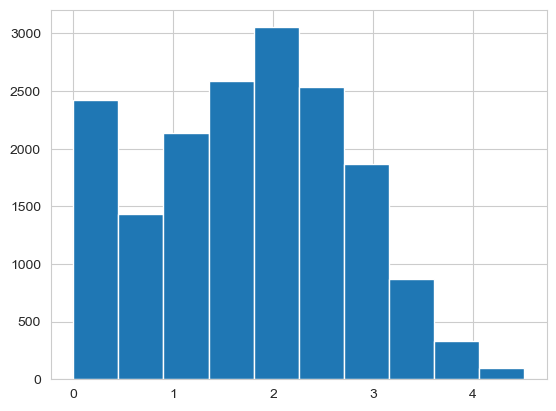

In [31]:
plt.hist([np.log10(len(x)) for x in disease_seq])